Requesting McDonalds...Done!
Requesting Fedex...Done!
Requesting Chipotle...Done!
Requesting Microsoft...Done!
Requesting Disney...Done!


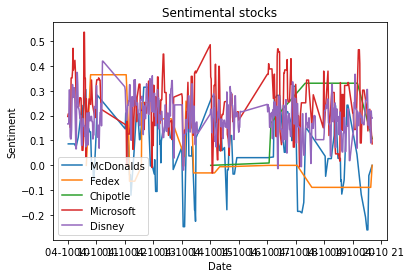

In [1]:
#!/bin/python
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as pltdates
import requests
import time
from scipy import signal
before = int(time.time())
after = before - 12*3600
companies = ["McDonalds", "Fedex", "Chipotle", "Microsoft", "Disney"]
#plt.xkcd()
fig, ax = plt.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment")
ax.set_title("Sentimental stocks")
for company in companies:
    print(f"Requesting {company}...", end="")
    r = requests.get(f"http://167.172.114.123:5050/api/sentiments?company={company}&before={before}&after={after}")
    values = r.json()
    x_vals = [datetime.fromtimestamp(x[0]) for x in values]
    y_vals = [x[1] for x in values]
    #ax.plot(x_vals, y_vals, label=company)
    ax.plot_date(pltdates.date2num(x_vals), signal.medfilt(y_vals),
                 label=company, linestyle='solid', marker=None)
    print(f"Done!")
ax.legend()
ax.plot()
plt.show()